In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.optimize as op
from matplotlib import cm

# input is numpy array
# it is splitted into X and Y
def f(vec_XY):
    x = vec_XY[0]
    y = vec_XY[1]
    var = -1/(1 + x**2 + y**2) - 2 / (1 + (x - 3)**2 + (y - 4)**2)
    return var

def grad_f(vec_XY):
    x = vec_XY[0]
    y = vec_XY[1]
    gradXY = np.array([ (2 * x) / (1 + x**2 + y**2)**2 + 4 * (x - 3) / (1 + (x - 3)**2 + (y - 4)**2)**2, 
                        (2 * y) / (1 + x**2 + y**2)**2 + 4 * (y - 4) / (1 + (x - 3)**2 + (y - 4)**2)**2])
    return gradXY

def contoursteps(x1, x2, zs, xIter, steps=None):
    fig = plt.figure(figsize=(6,6))
    cp = plt.contour(x1, x2, zs, 15)
    plt.clabel(cp, inline=1, fontsize=10)
    npIter = np.array(xIter)
    plt.plot(npIter[:,0], npIter[:,1],'*-r') 
    plt.show()

def plot_surface():
    fig = plt.figure(figsize=(10,8))
    qf = fig.gca(projection='3d')
    size = 50
    x = list(np.linspace(-3, 7, size))
    y = list(np.linspace(-3, 7, size))
    # cartesian binary expression
    X, Y = np.meshgrid(x, y)
    Z = np.zeros((size, size))
    for i in range(size):
        for j in range(size):
            x_vec = np.matrix([[X[i,j]], [Y[i,j]]])
            Z[i,j] = f(x_vec)
    qf.plot_surface(X, Y, Z, rstride=1, cstride=1, cmap=cm.coolwarm, linewidth=0)
    plt.show()
    return X, Y, Z

In [2]:
# Find minimum using BFGS
# The function has two different local minima at (0,0) and (3,4).
# If we chose the intial point close to (0,0) then we find x = (0,0) as local minimum.
# If we chose the intial point close to (3,4) then we find x = (3,4) as local minimum.
x , xiter= op.fmin_bfgs(f, x0=np.array([2, 2]), fprime = grad_f, disp=True, retall = True)
print('Min Point {0}, Gradient {1}: , Func Value: {2}'.format(x, grad_f(x), f(x)))

Optimization terminated successfully.
         Current function value: -2.038489
         Iterations: 7
         Function evaluations: 14
         Gradient evaluations: 14
Min Point [2.99777586 3.99703469], Gradient [-1.81369203e-06 -1.58155290e-06]: , Func Value: -2.038488950330747


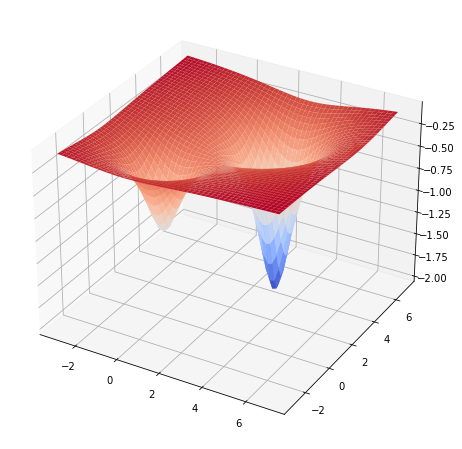

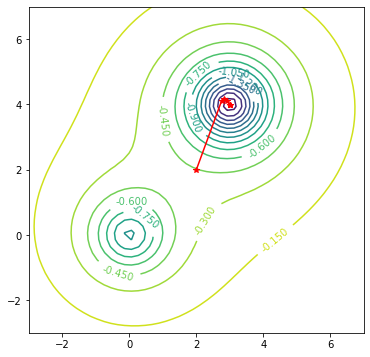

In [3]:
# Plot Surface A1.
X, Y, Z = plot_surface()
contoursteps(X, Y, Z, xiter)